In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [15]:
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to ﬁve Boston employment centers
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per $10,000
#PTRATIO: pupil-teacher ratio by town 12. 
#B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [17]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [19]:
df=pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape

(505, 1)

In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [70]:
import math
def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols=3
    n_rows=math.ceil(len(num_cols)/n_cols)
    plt.figure(figsize=(5*n_cols,4*n_rows))
    
    for i, col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],bins=30, kde=True)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel(""),
        plt.ylabel("")
    
    plt.tight_layout()
    plt.show()
   



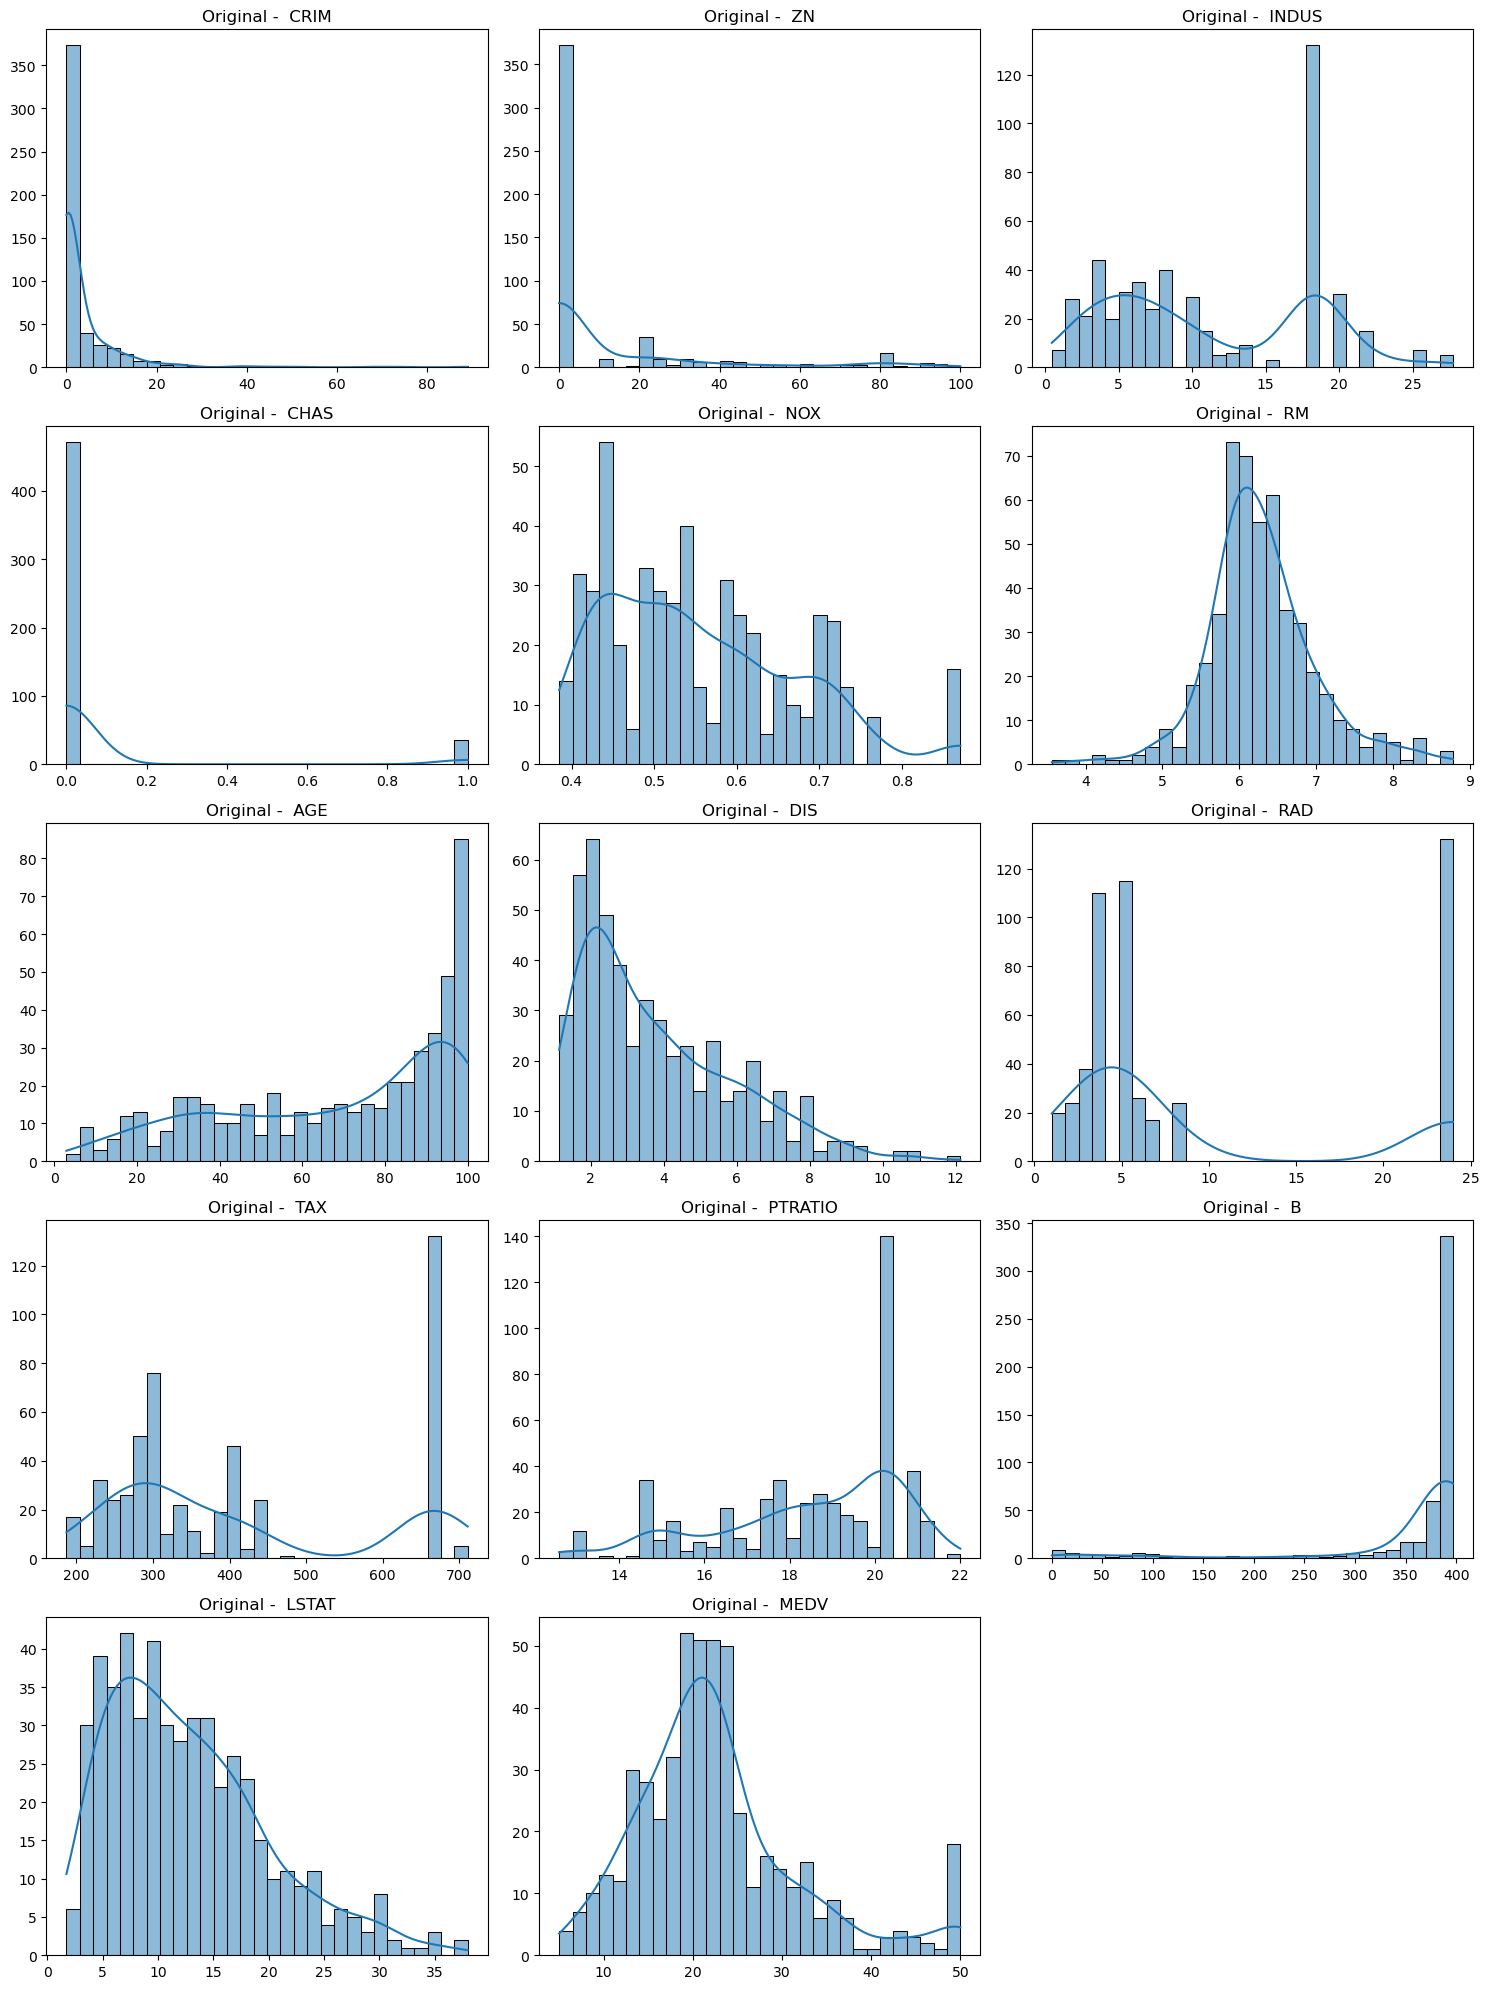

In [74]:
plot_all_histograms(df,title_prefix= "Original - ")

In [43]:
num_cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")
        
    plt.tight_layout()
    plt.show()

In [76]:
from scipy.stats import skew 

In [80]:
df.apply(skew).sort_values(ascending=False)

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
MEDV       1.104811
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

In [92]:
X=df.drop("MEDV",axis=1) #Apply Yeo Johnson
y=df["MEDV"] #Apply BoxCox

In [94]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [100]:
from sklearn.preprocessing import PowerTransformer

In [102]:
pt_X = PowerTransformer(method="yeo-johnson")

X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [108]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] #removed MEDV column(y)

In [110]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)

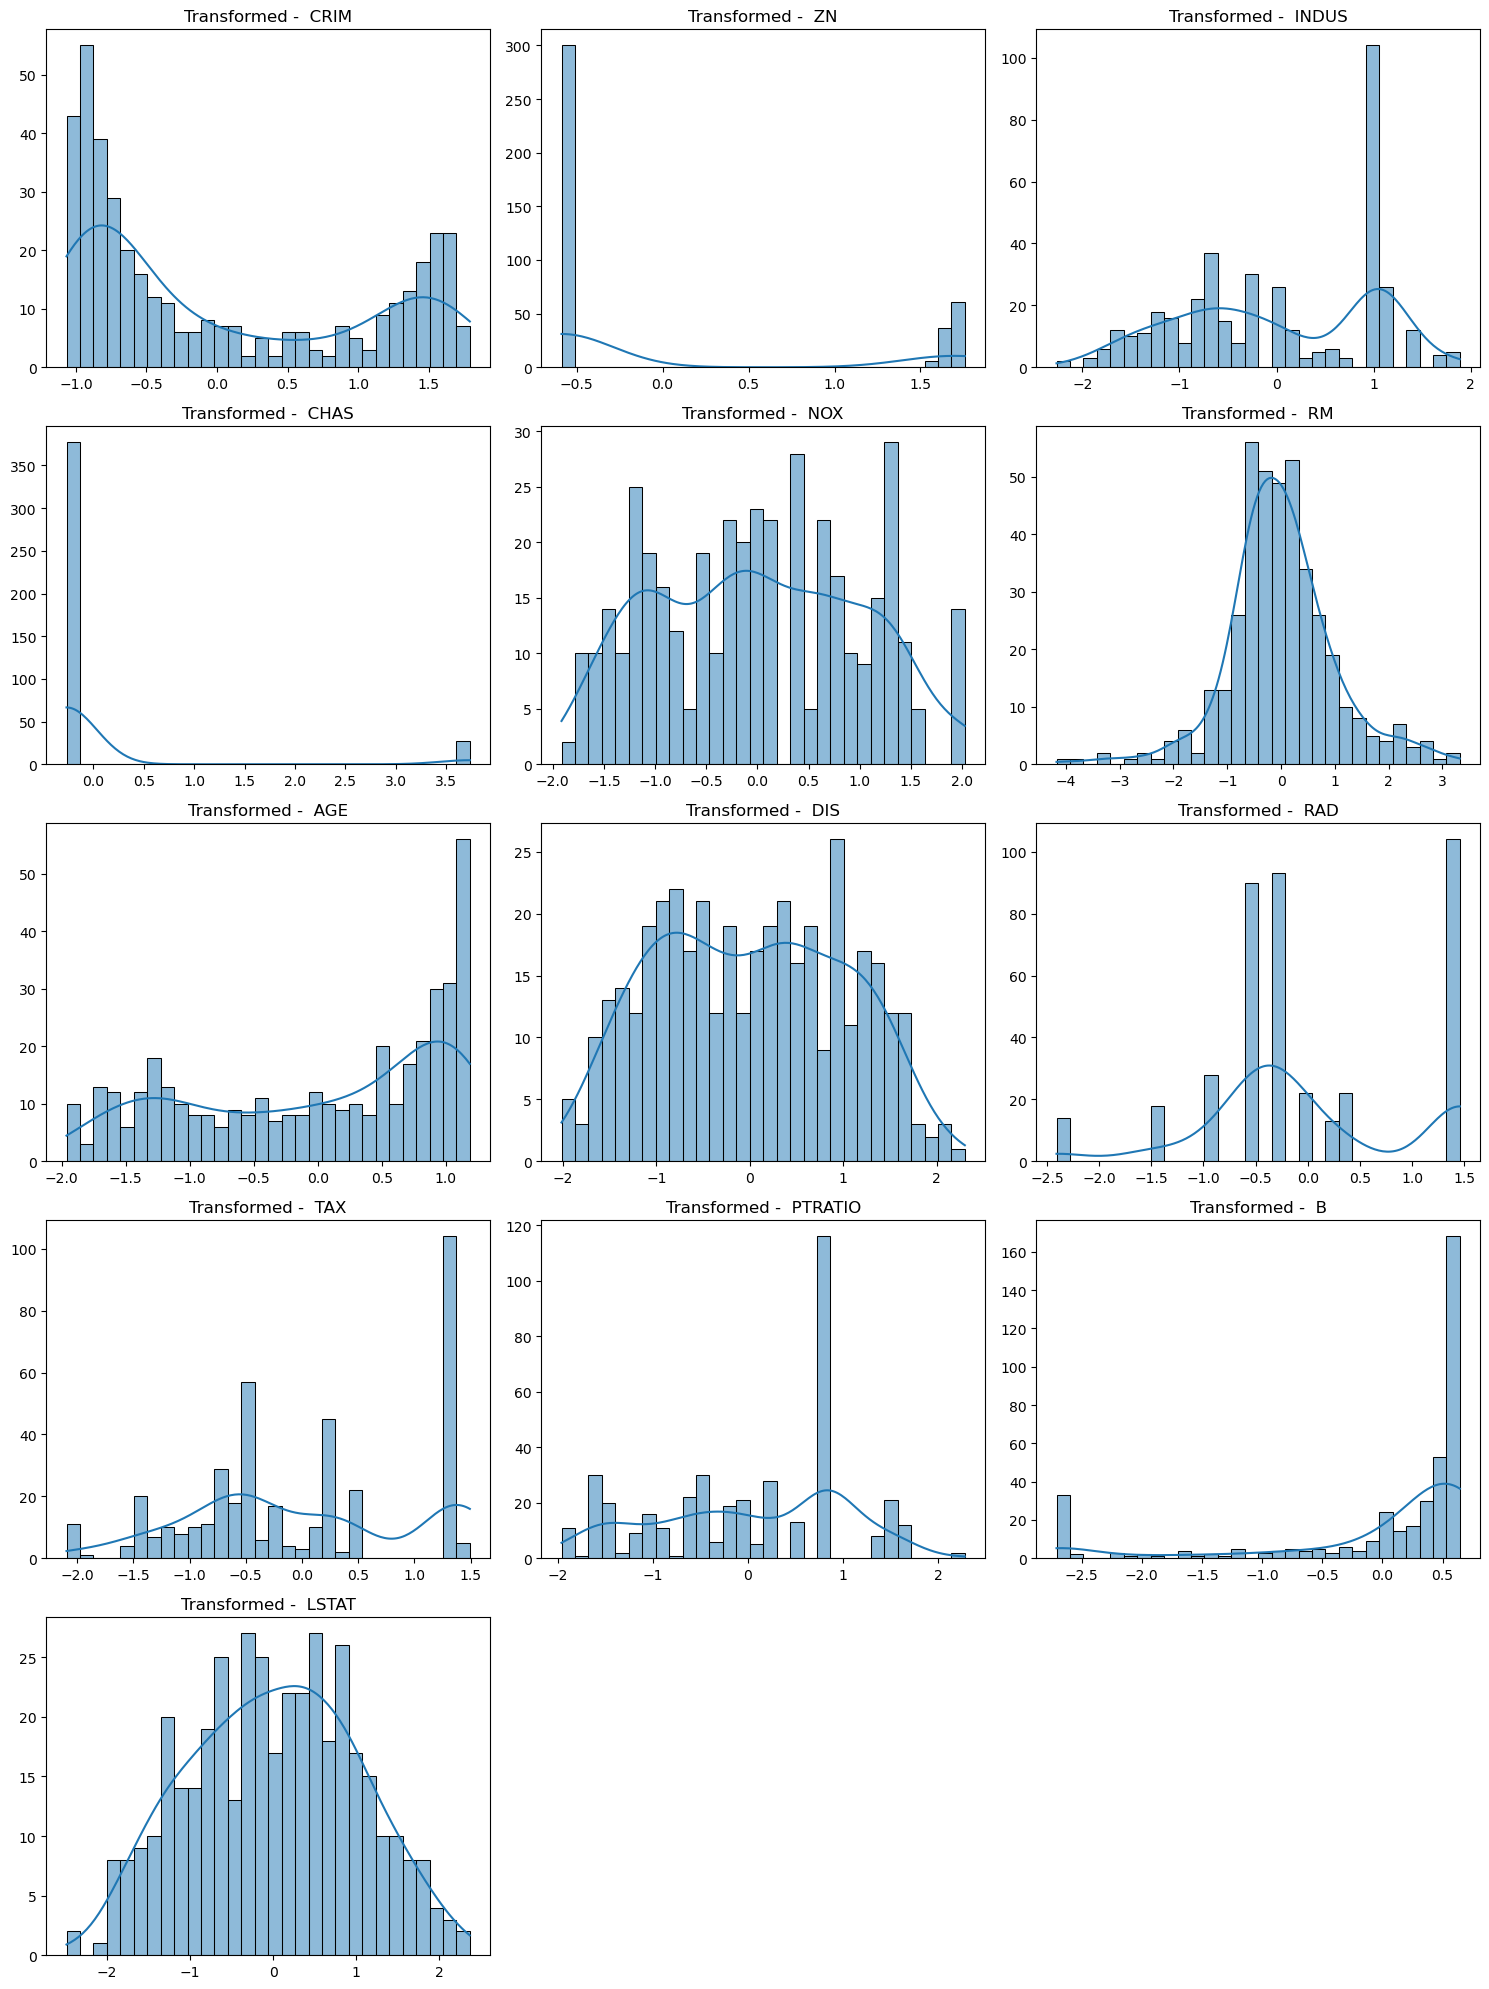

In [112]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

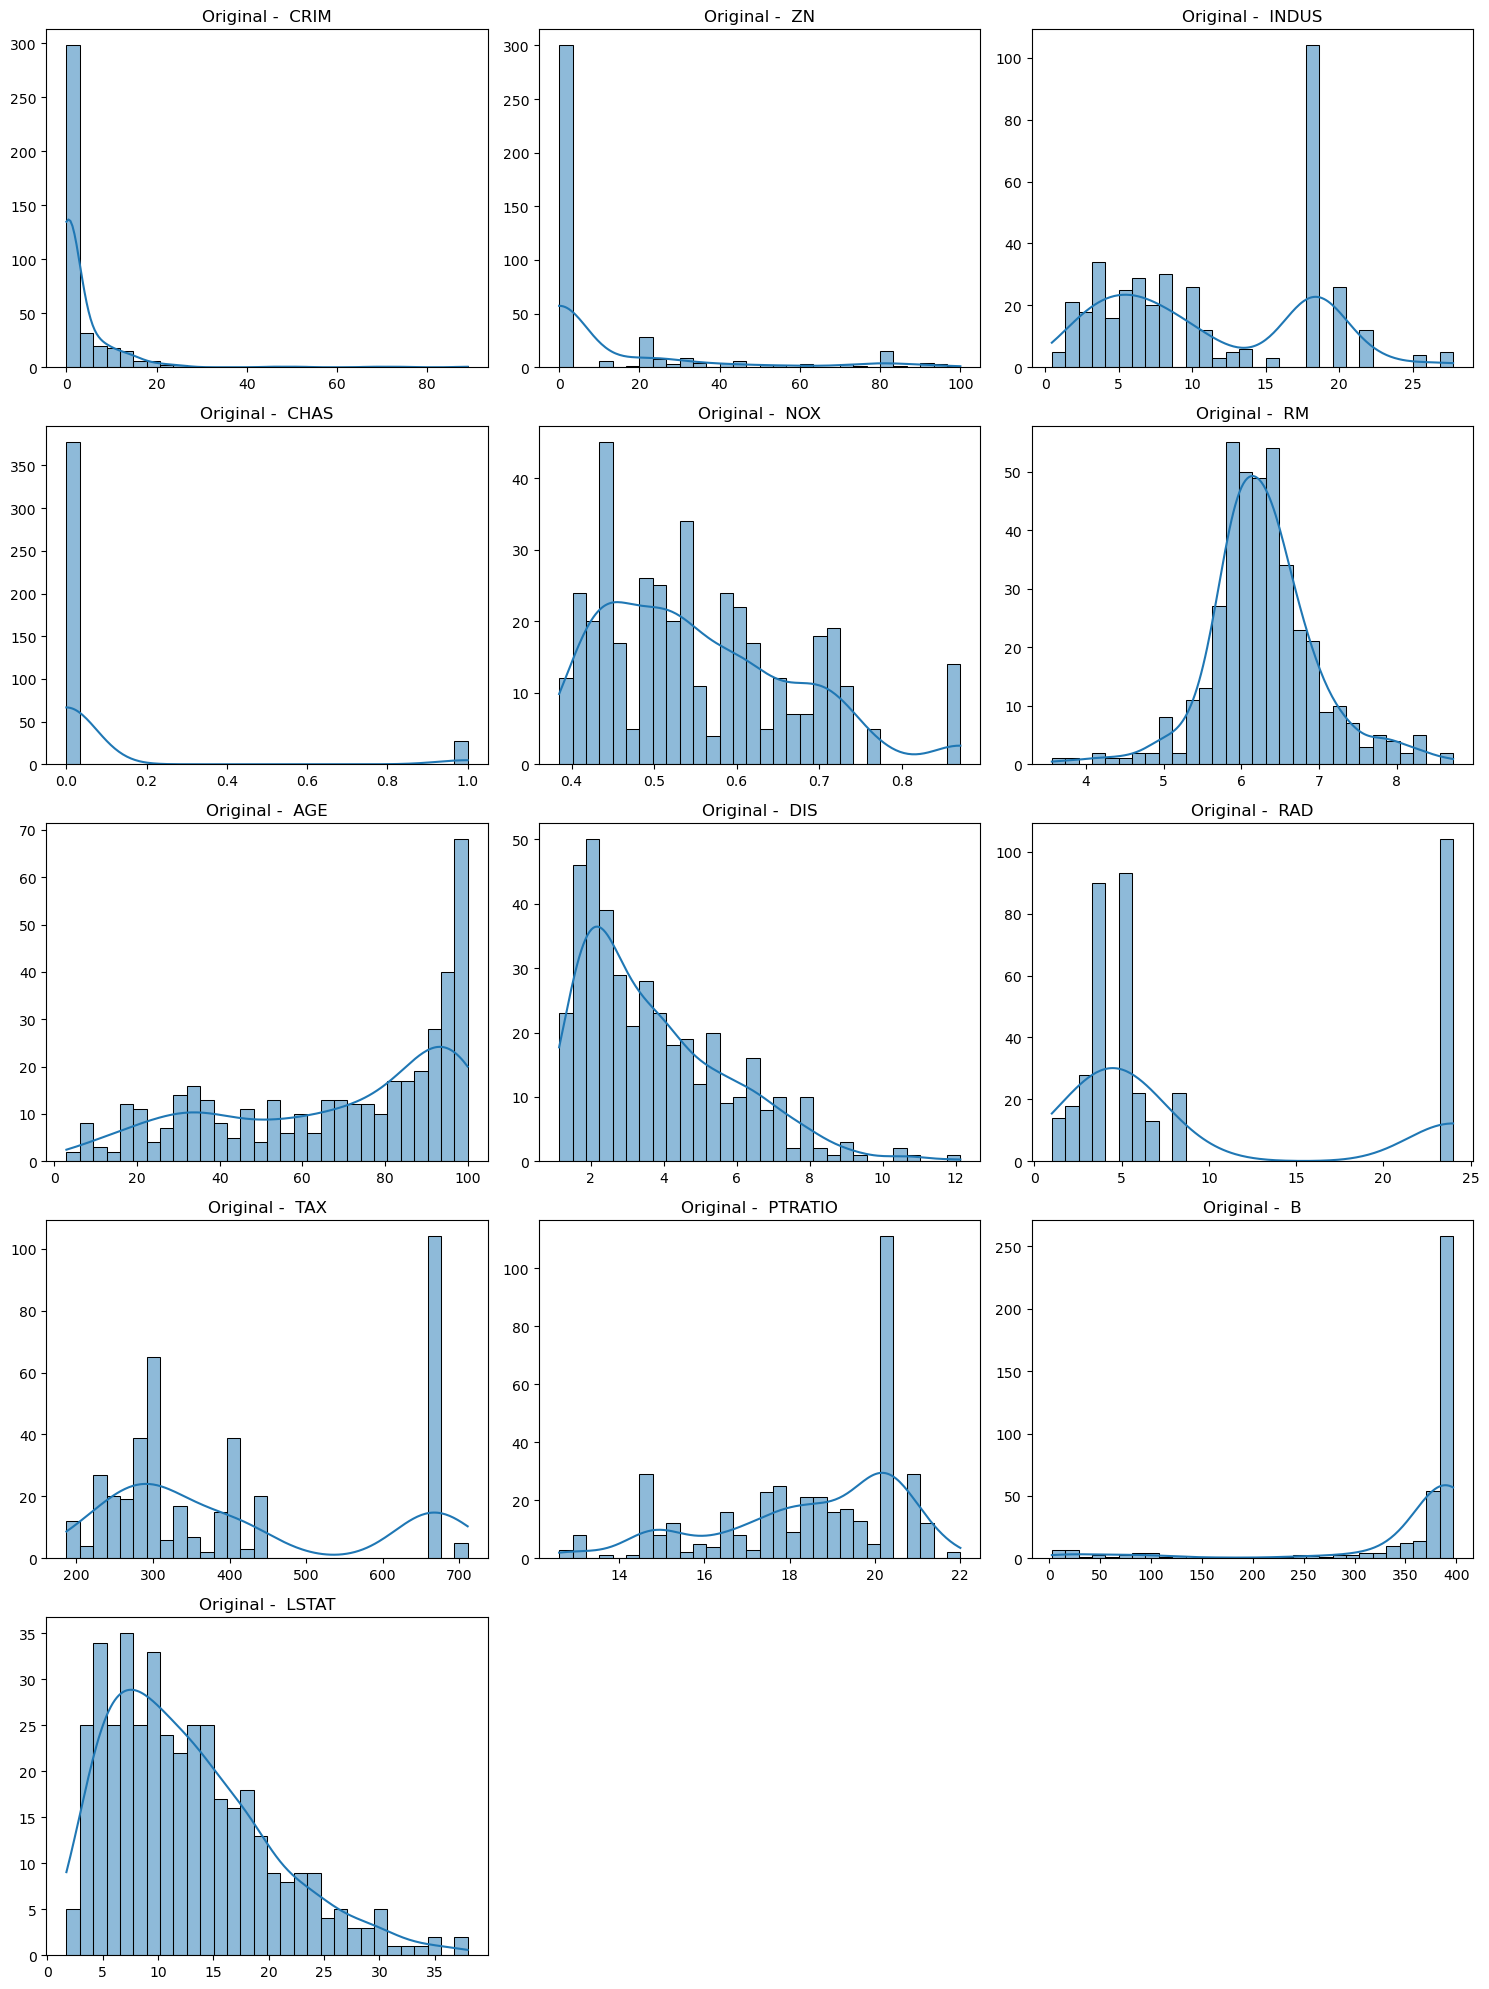

In [114]:
plot_all_histograms(X_train, title_prefix="Original - ")

In [116]:
from scipy.stats import boxcox

In [118]:
y_train_transformed, lambda_y = boxcox(y_train)

In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [124]:
y_pred_transformed = model.predict(X_test_transformed)

def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [130]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [132]:
print("R2 Score:", r2_score(y_test, y_pred_original))
print("MSE:", mean_squared_error(y_test, y_pred_original))
print("MAE:", mean_absolute_error(y_test, y_pred_original))

R2 Score: 0.7755639719636047
MSE: 17.35592797694879
MAE: 3.0792906156912467
